# Callbacks in Scikit-Optimize

Todd Young

## Introduction 

Callbacks are functions that, when passed as an argument to another function, are invoked after some event in the parent function completes.

Callbacks in Scikit-Optimize can give you a view into what is happening in your optimization. This can be as simple as making the optimization verbose or timing the the iterations of your optimization procedure. Callbacks can also give you finer control over the optimization procedure through early stopping. For those who need something a bit beyond what the default functions can provide, it is even possible to write custom callbacks.

Let's take a look at Scikit-Optimize's monitoring and early stopping callbacks as well as how to write your own custom callback. Say you are looking at the following Hartmann 3 function [[1]](http://www-optima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO_files/Page1488.htm) and would like find its global minimum using a Gaussian process.

In [1]:
import numpy as np

def hart3(x,
          alpha=np.asarray([1.0, 1.2, 3.0, 3.2]),
          P=10**-4 * np.asarray([[3689, 1170, 2673],
                                 [4699, 4387, 7470],
                                 [1091, 8732, 5547],
                                 [381, 5743, 8828]]),                   
          A=np.asarray([[3.0, 10, 30],
                       [0.1, 10, 35],
                       [3.0, 10, 30],
                       [0.1, 10, 35]])):
    """
    The 3-dimensional Hartmann function with 4 local minima.
    The function is usually evaluated on the hypercube xi ∈ (0, 1), for all i = 1, 2, 3.
    Global minimum is at f(x*) = -3.86278 at x* = (0.114613, 0.555649, 0.852547)
    See more here: http://www.sfu.ca/~ssurjano/hart3.html
    """
    return -np.sum(alpha * np.exp(-np.sum(A * (np.array(x) - P)**2, axis=1)))

The simplest callback comes in the form of verbose mode. Since it can be a bit worrisome to wait on your function to finish without any feedback, many Python libraries having iterative processes provide a verbose mode, and skopt is no exception. 

In [17]:
from skopt import gp_minimize

dimensions  = [(0.0, 1.0), # Bounds to search for each dimension
               (0.0, 1.0),
               (0.0, 1.0)]           

# the number of evaluations of our function
n_calls = 100

res = gp_minimize(hart3,                  # the function to minimize
                  dimensions=dimensions,  # the bounds on each dimension of x
                  acq_func="EI",          # the acquisition function
                  n_calls=n_calls,        # the number of evaluations of our function 
                  n_random_starts=5,      # the number of random initialization points
                  random_state=123,       # the random state
                  verbose=True)           # the verbose callback!

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0009
Function value obtained: -0.5198
Current minimum: -0.5198
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0006
Function value obtained: -0.8106
Current minimum: -0.8106
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0006
Function value obtained: -0.2488
Current minimum: -0.8106
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0007
Function value obtained: -1.9504
Current minimum: -1.9504
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.3539
Function value obtained: -0.5765
Current minimum: -1.9504
Iteration No: 6 started. 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.5704
Function value obtained: -0.0334
Current minimum: -3.8627
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.5378
Function value obtained: -0.0015
Current minimum: -3.8627
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.5509
Function value obtained: -3.8569
Current minimum: -3.8627
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.5196
Function value obtained: -0.1198
Current minimum: -3.8627
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.5817
Function value obtained: -3.4645
Current minimum: -3.8627
Iteration No: 46 st

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 0.8924
Function value obtained: -0.1347
Current minimum: -3.8627
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 0.7956
Function value obtained: -3.6790
Current minimum: -3.8627
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 0.7805
Function value obtained: -3.8616
Current minimum: -3.8627
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 0.7854
Function value obtained: -3.8485
Current minimum: -3.8627
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 0.9325
Function value obtained: -2.9311
Current minimum: -3.8627
Iteration No: 86 st

When we set `verbose=True`, we are invoking a callback. Here is what is what is happening under the hood:

To see that this is actually happening, let's do something absurd. Let's set `verbose=False`, and then explicitly call the `VerboseCallback` class in our `callback` argument. This gives us the same output as when we set `verbose=True`.

In [25]:
from skopt.callbacks import VerboseCallback

res = gp_minimize(hart3,                  
                  dimensions=dimensions,  
                  acq_func="EI",          
                  n_calls=n_calls,         
                  n_random_starts=5,      
                  random_state=123,       
                  verbose=False,                               # Note this is False! 
                  callback=VerboseCallback(n_total=n_calls))   # explicitly calling the callback!

Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 0.0159
Function value obtained: -0.5198
Current minimum: -0.5198
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 0.0010
Function value obtained: -0.8106
Current minimum: -0.8106
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 0.0007
Function value obtained: -0.2488
Current minimum: -0.8106
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 0.0006
Function value obtained: -1.9504
Current minimum: -1.9504
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 0.3994
Function value obtained

Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.6904
Function value obtained: -2.3026
Current minimum: -3.8627
Iteration No: 41 started. Searching for the next optimal point.
Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.7105
Function value obtained: -0.0334
Current minimum: -3.8627
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.6029
Function value obtained: -0.0015
Current minimum: -3.8627
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.5196
Function value obtained: -3.8569
Current minimum: -3.8627
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.5216
Function value obtained: -0.1198
Current minimum: -3.8627
Iteration No: 45 st

Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 0.7515
Function value obtained: -3.8580
Current minimum: -3.8627
Iteration No: 81 started. Searching for the next optimal point.
Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 0.7499
Function value obtained: -0.1347
Current minimum: -3.8627
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 0.7424
Function value obtained: -3.6790
Current minimum: -3.8627
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 0.7395
Function value obtained: -3.8616
Current minimum: -3.8627
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 0.7210
Function value obtained: -3.8485
Current minimum: -3.8627
Iteration No: 85 st

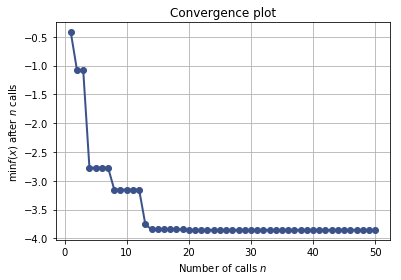

In [47]:
from skopt.plots import plot_convergence

plot_convergence(res)

In [12]:
res_gp = gp_minimize(objective, space, n_calls=15, random_state=0, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2421
Function value obtained: 6.3734
Current minimum: 6.3734
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1877
Function value obtained: 5.6234
Current minimum: 5.6234
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1878
Function value obtained: 3.6166
Current minimum: 3.6166
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.2017
Function value obtained: 7.0728
Current minimum: 3.6166
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1965
Function value obtained: 5.9574
Current minimum: 3.6166
Iteration No: 6 started. Evaluating

In [13]:
res_gp = gp_minimize(objective, space, n_calls=15, random_state=0)

In [2]:
from skopt.callbacks import TimerCallback

have_the_time = TimerCallback()

In [21]:
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0, callback=have_the_time)

In [22]:
len(have_the_time.iter_time)

45

In [25]:
from skopt.callbacks import EarlyStopper, DeltaYStopper

early_stop = DeltaYStopper(delta=0.5)

In [26]:
res_gp = gp_minimize(objective, space, n_calls=100, random_state=0, callback=[talk_to_me, early_stop])

Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 978.5730
Function value obtained: 6.3734
Current minimum: 6.3734
Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 978.7911
Function value obtained: 5.6234
Current minimum: 5.6234
Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 979.0043
Function value obtained: 3.6166
Current minimum: 3.6166
Iteration No: 66 ended. Search finished for the next optimal point.
Time taken: 979.2358
Function value obtained: 7.0728
Current minimum: 3.6166
Iteration No: 67 ended. Search finished for the next optimal point.
Time taken: 979.4463
Function value obtained: 5.9574
Current minimum: 3.6166
Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 979.9679
Function value obtained: 3.4509
Current minimum: 3.4509
Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 980.3369
Function value obtained: 4.1702
Current m

In [28]:
len(res_gp)

8

In [40]:
early_stop_time = TimerCallback()

early_stop_small = DeltaYStopper(delta=0.01)
res = gp_minimize(objective, space, n_calls=100, random_state=0, callback=[early_stop_time, early_stop_small])

In [44]:
len(early_stop_time.iter_time)

26

In [45]:
earlystop_largedelta = TimerCallback()

early_stop_small = DeltaYStopper(delta=0.5)
res = gp_minimize(objective, space, n_calls=100, random_state=0, callback=[earlystop_largedelta, early_stop_small])

In [48]:
len(earlystop_largedelta.iter_time)

15

## References 

[1] http://www-optima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO_files/Page1488.htm